**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.
 

**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

**Dataset:**

The dataset has the following columns:

* **tweet_id**                                                           
* **airline_sentiment**                                               
* **airline_sentiment_confidence**                               
* **negativereason**                                                   
* **negativereason_confidence**                                    
* **airline**                                                                    
* **airline_sentiment_gold**                                              
* **name**     
* **negativereason_gold** 
* **retweet_count**
* **text**
* **tweet_coord**
* **tweet_created**
* **tweet_location** 
* **user_timezone**

In [1]:
# !pip install contractions

In [2]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
data=pd.read_csv('drive/My Drive/Machine Learning Course/Artificial Intelligence/NLP/Vectorizer/Project/Tweets.csv')

In [6]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
data.sample(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12139,570278869133107201,negative,1.0000,Cancelled Flight,1.0000,American,NaN,SusieBarre,NaN,0,@AmericanAir my flight 386 to Dallas from Jack...,NaN,2015-02-24 09:47:32 -0800,NaN,NaN
6253,568093988516802560,positive,0.7072,NaN,NaN,Southwest,NaN,kirkwoodtiger,NaN,0,“@SouthwestAir: @kirkwoodtiger Hmmm... how doe...,NaN,2015-02-18 09:05:36 -0800,Kirkwood Missouri,Central Time (US & Canada)
11253,568284538914385920,negative,0.6699,Can't Tell,0.6699,US Airways,NaN,KBStrauss,NaN,0,@USAirways thank you.3860 to cincy.just landed...,NaN,2015-02-18 21:42:46 -0800,New York City,Eastern Time (US & Canada)
12777,570028125024706561,negative,1.0000,Late Flight,0.6629,American,NaN,msofka,NaN,0,"@AmericanAir now I have to wait ""more than 60 ...","[41.45875201, -81.86775899]",2015-02-23 17:11:10 -0800,"Cleveland, OH",Central Time (US & Canada)
4214,567771124235517952,negative,1.0000,Flight Attendant Complaints,0.6789,United,NaN,thodge77,NaN,0,"@united flt 4567 no gate agent, no announcemen...",NaN,2015-02-17 11:42:39 -0800,Memphis,Central Time (US & Canada)
11309,568220625648672768,negative,1.0000,Cancelled Flight,1.0000,US Airways,NaN,dmorgancu,NaN,0,@USAirways you have most likely lost my busine...,"[35.22447828, -80.93940943]",2015-02-18 17:28:48 -0800,"Clemson, SC",Central Time (US & Canada)
8614,568109390026448896,negative,1.0000,Customer Service Issue,1.0000,Delta,NaN,j_beatz247,NaN,0,@JetBlue you respond to my friend @LisaPal but...,NaN,2015-02-18 10:06:48 -0800,new orleans,NaN
12313,570236690637459456,positive,1.0000,NaN,NaN,American,NaN,JohnCFitness,NaN,0,@AmericanAir simply amazing. Smiles for miles....,NaN,2015-02-24 06:59:56 -0800,World Wide.,Pacific Time (US & Canada)
3305,568538044703178752,neutral,0.7028,NaN,0.0000,United,NaN,TheKevinDent,NaN,0,@united will I make it with the delay?,NaN,2015-02-19 14:30:07 -0800,Look behind you,Pacific Time (US & Canada)
3836,568090924141703169,neutral,0.6774,NaN,0.0000,United,NaN,katieaune,NaN,0,"@united ha, this happened 10 years ago. i have...",NaN,2015-02-18 08:53:25 -0800,Chicago,Central Time (US & Canada)


In [8]:
data.shape

(14640, 15)

Looks like the dataset contains 14640 twitter tweets

In [9]:
df = data.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Exploratory Data Analysis

**Missing Values**


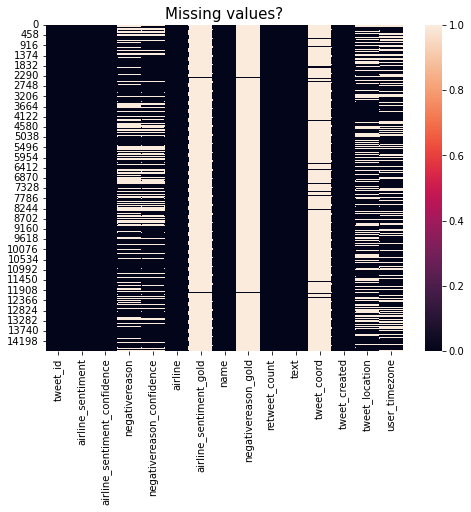

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

From the visual analysis for missing values - looks like the columns 'airline_sentiment_gold','negativereason_gold',tweet_cord' are almost completely empty. The other columns which contain missing values are -'negativereason', 'negativereason_confidence', 'tweet_location', 'user_timezone'.


Let us analyze the number of missing values in each column

In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [13]:
missing_zero_values_table(df)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.8,14608,99.8,object
airline_sentiment_gold,0,14600,99.7,14600,99.7,object
tweet_coord,0,13621,93.0,13621,93.0,object
negativereason,0,5462,37.3,5462,37.3,object
user_timezone,0,4820,32.9,4820,32.9,object
tweet_location,0,4733,32.3,4733,32.3,object
negativereason_confidence,1344,4118,28.1,5462,37.3,float64


In [14]:
data["negativereason_confidence"].isna().sum()

4118

As discussed before, the columns:
* 'negativereason_gold' has 14608 missing values contributing to 99.8%
* 'airline_sentiment_gold' has 14600 missing values contributing to 99.7%
* 'tweet_coord' has 13621 missing values contributing to 93%
* 'negativereason' has 5462 missing values contributing to 37.3%
* 'user_timezone' has 4820 missing values contributing to 32.9%
* 'tweet_locaiton' has 4733 missing values contributing to 32.3%
* 'negativereason_confidence' has 4118 missing values contributing to 28,1%

In [15]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Data Distribution**

Let us look at the distribution of data in the columns:

In [16]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [18]:
data["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

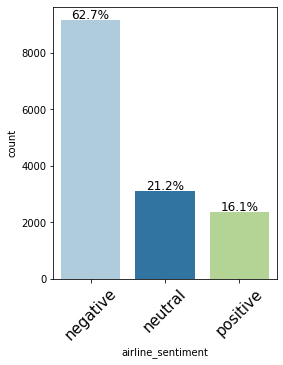

In [19]:
labeled_barplot(data, "airline_sentiment", perc=True)

looks like most of the tweets have negative sentiment - about 62%, followed by neutral tweets - 21%, and then positive tweets - 16%

In [20]:
data["airline"].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

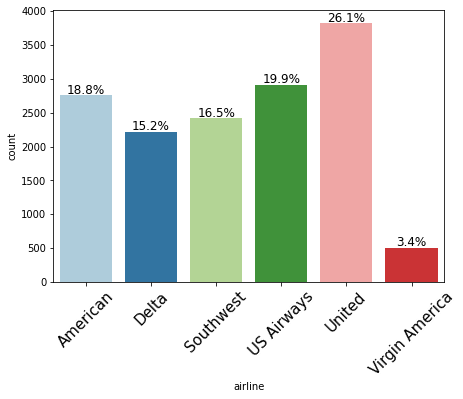

In [21]:
labeled_barplot(data, "airline", perc=True)

United airline has the most tweets at about 3800, American, Delta, Southwest, US Airways all have almost the same number of tweets at about 2300 - 2700. Virgin America has the lowest number of tweets contritbuting only 3.4%

Let us look at how the sentiment looks for each of the airline

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


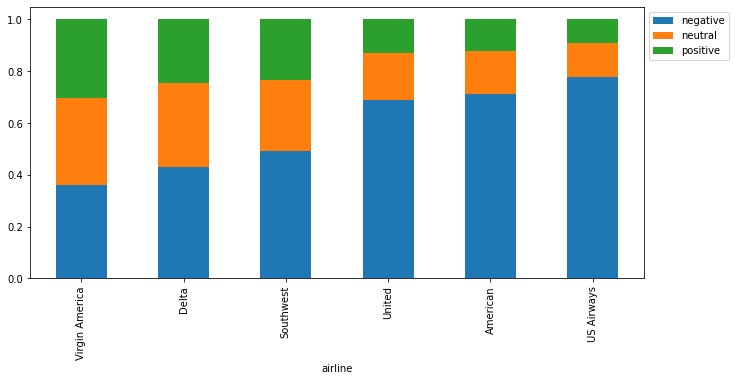

In [22]:
stacked_barplot(data, "airline", "airline_sentiment")

* **Virgin America**:

  Virgin America has almsot equal split between the tweets - 181 negative tweets, 152 positive tweets and 171 neutral tweets
* **Delta**:

  Delta has a little more negative tweets compared to each positive and negative tweets - about 43%, positive tweets - about 24.48%, neutral tweets - 32.53%

* **Southwest**:

  Southwest also has more negative tweets - about 49%, postive tweets - about 23.45%, neutral tweets - about 27.43%

* **United**:

  United also has more negative tweets - about 69%, positive tweets - 12.87%, neutral tweets - 18.24%

* **American**:

  More negative tweets at about 71%, positive tweets - 12.17%, neutral tweets - 16.78%

* **US Airways**:
  
  More negative tweets - 77.69%, positive tweets - 9.23%, neutral tweets - about 13%

Let us see what negative reasons do customers have for a negative sentiment:

In [23]:
data["negativereason"].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

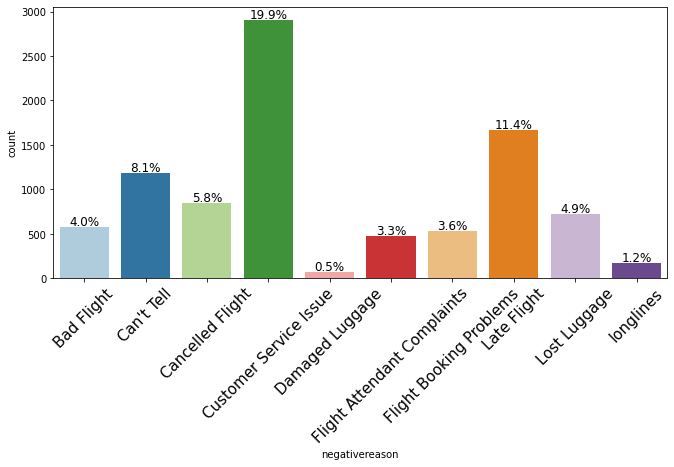

In [24]:
labeled_barplot(data, "negativereason", perc=True)

About 20% of the negative sentiment is because of 'cancelled flight' followed by 'Flight booking problems', 'Cant'tell', 'Lost luggage', and 'Bad Flight'


Let us connect the airline and the negative reasons.

In [25]:
data_negativesentiment = data[data["airline_sentiment"] == 'negative']

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
All                    580        1190               847   
United                 216         379               181   
Southwest               90         159               162   
American                87         198               246   
Delta                   64         186                51   
US Airways             104         246               189   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
All                               2910               74   
United                             681               22   
Southwest                          391               14   
American                           768               12   
Delta                              199               11   
US Airways                         811        

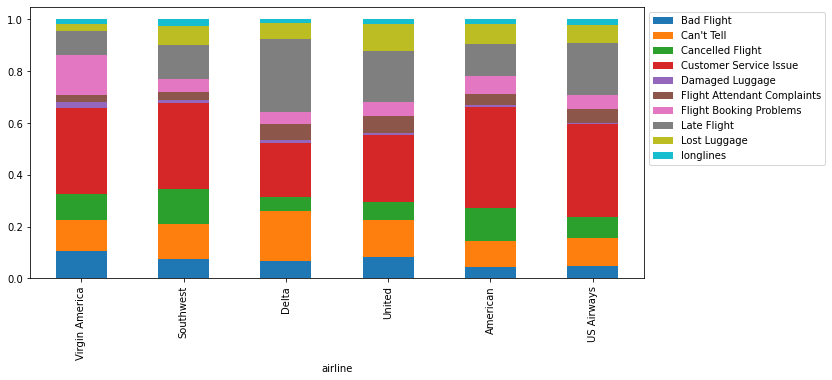

In [26]:
stacked_barplot(data_negativesentiment, "airline", "negativereason")

* For Delta, 'Late flight' has been their key problem
* For all other airlines, 'Customer Service Issue' seems to be the key issue

**Summary from Exploratory Data Analysis:**

* Most of the tweets have negative sentiment - about 62%, followed by neutral tweets - 21%, and then positive tweets - 16%

* United airline has the most tweets at about 3800, American, Delta, Southwest, US Airways all have almost the same number of tweets at about 2300 - 2700. Virgin America has the lowest number of tweets contritbuting only 3.4%

* Except for Virgin America and Delta, all the airlines had majority negative tweets.

* For Delta, 'Late flight' has been their key problem

* For all other airlines, 'Customer Service Issue' seems to be the key issue

## Text Pre-processing:

Since all other columns except the airline_sentiment and text column would be reduntant, let us drop all other columns except these two

In [27]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [28]:
columns_to_drop = ['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone']

In [29]:
data = data.drop(columns_to_drop, axis=1)

In [30]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Now, the new dataframe has only 'text' and 'airline_sentiment' columns

Removing HTML tags:

In [31]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Replacing contractions

In [32]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


we can see that it's been converted to it is

Removing numbers

In [33]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [34]:
data.sample(20)

,airline_sentiment,text
7201,positive,@JetBlue @jeff_hofmann @DeniseJTaylor @LaurieA...
1996,negative,"@united A day Late Flightr, one delayed & one ..."
5181,negative,@SouthwestAir breaking my heart at BWI hrs @b...
4604,positive,Never got to the strip that fast before. Stoke...
8007,positive,@JetBlue - loving Capt Joe on our flight from ...
2658,neutral,@united I am going to a service desk now to se...
4318,negative,@united please see a flight attendant for what...
11325,negative,@USAirways Oh certainly. And now I have two $ ...
13172,negative,@AmericanAir - I would be happy to hold on the...
1708,negative,@united the costumer services here at Denver I...


We could clearly see that the @ tagging for the airways is present throughout all the text rows, we need to remove those to prevent those words to not bias the results. We will tokenize the word, remove @ symbol and strip the words like southwestair, jetblue, usairways, americanair, united, virginamerica

Let us first tokenize the word

In [35]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [36]:
data.sample(5)

,airline_sentiment,text
3617,positive,"[@, united, @, staralliance, was, there, few, ..."
4101,negative,"[@, united, I, am, /, for, Flight, Booking, Pr..."
2276,negative,"[@, united, We, have, let, you, know, how, to,..."
9792,negative,"[@, USAirways, Can, you, advise, on, what, is,..."
14504,negative,"[@, AmericanAir, many, have, missed, connectio..."


Setting stopwords dictionary to remove the commonly occuring words

In [37]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [40]:
def multiple_word_remove_func(text, words_2_remove_list):
    '''
    Removes certain words from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes the defined words from the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
        words_2_remove_list (list): Words to be removed from the text, list of strings
    
    Returns:
        String with removed words
    '''     
    words_to_remove_list = words_2_remove_list
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in words_to_remove_list])
    return text

In [41]:
data['text'] = data['text'].apply(lambda x: multiple_word_remove_func(x,["southwestair", "jetblue", "usairways", "americanair", "united", "virginamerica","united", "unite"]))

In [42]:
data.head()

,airline_sentiment,text
0,neutral,dhepburn say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


Now we have removed the airline tagging names

Let us create a wordcloud of positive and negative sentiment text:

In [43]:

# data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

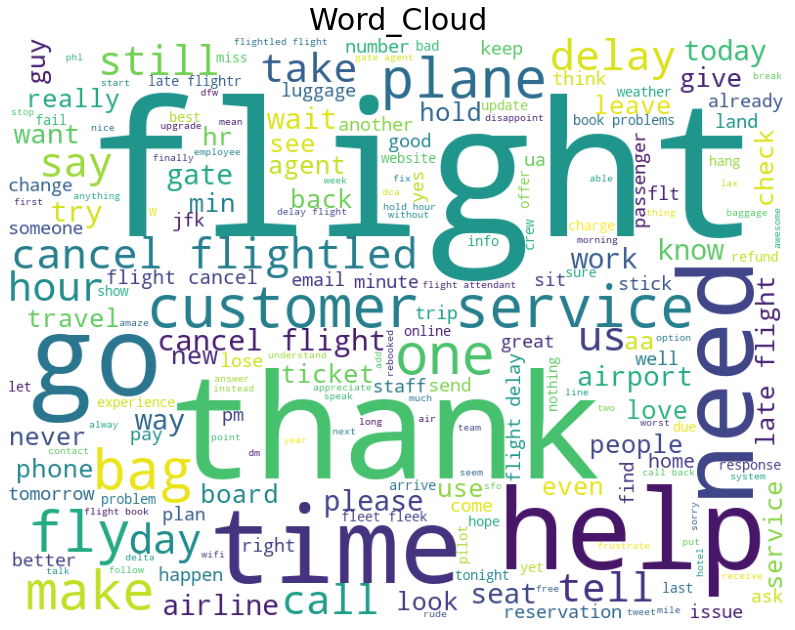

In [44]:
show_wordcloud(data,'Word_Cloud')

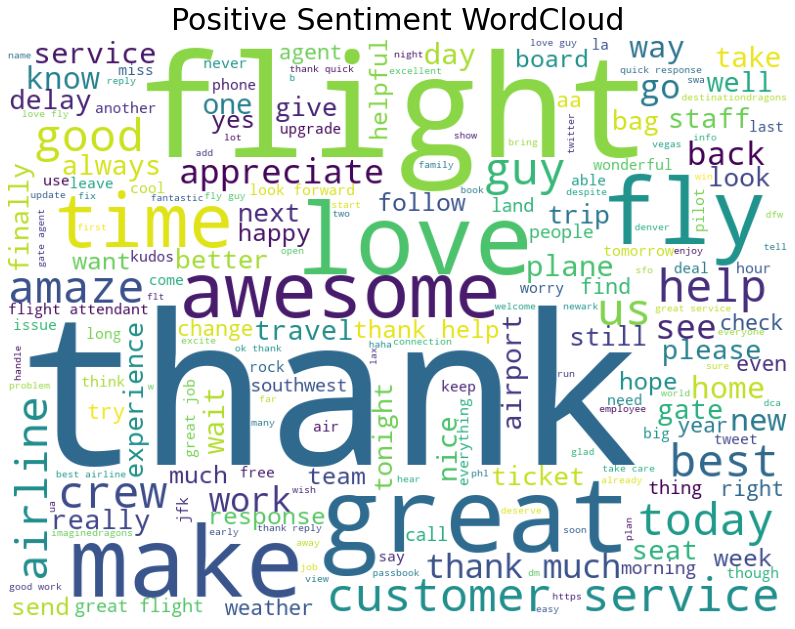

In [49]:
show_wordcloud(data[data['airline_sentiment'] == 'positive'], title = "Positive Sentiment WordCloud")

Words like - thank, awesome, love, great, good denote postive sentiment. We can clearly see the word cloud making sense for positive sentiment text after removing airline names so that they dont bias the data

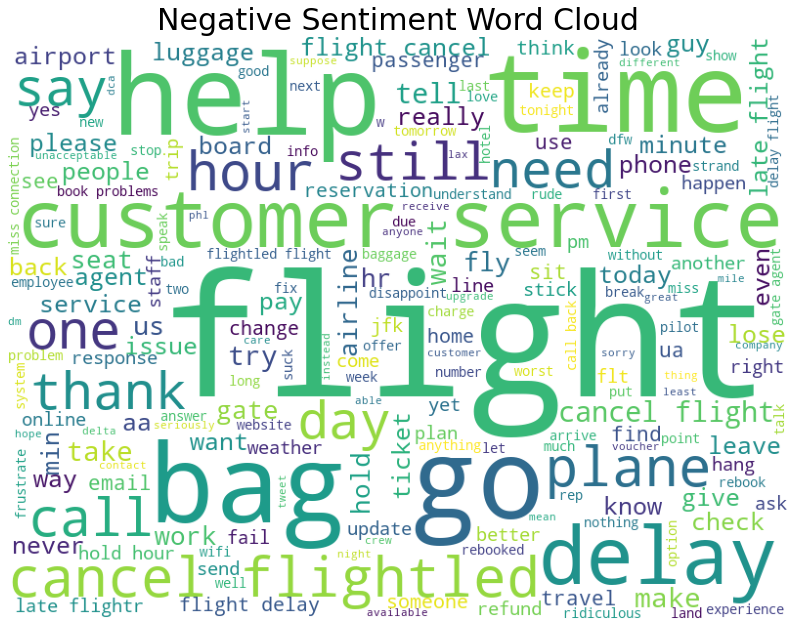

In [50]:
show_wordcloud(data[data['airline_sentiment'] == 'negative'], title = "Negative Sentiment Word Cloud")

Words like - cancel, delay, help, late denote postive negative. We can clearly see the word cloud making sense for negative sentiment text after removing airline names so that they dont bias the data

## Model Building:

**Count Vectorizer**

In [51]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()

In [52]:
data_features.shape

(14640, 2000)

In [60]:
labels = data['airline_sentiment']
labels = labels.astype('object')

In [61]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [62]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7426229508196721


The model accuracy is around 74%. Let us try to tune it. 

In [63]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [64]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

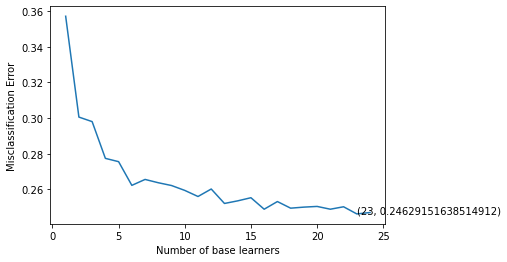

In [65]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [66]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7750455373406193

**The model accuracy after tuning is 77.5%**

In [67]:
result =  clf.predict(X_test)     

[[2530  200   84]
 [ 369  440   75]
 [ 175   85  434]]
0.7750455373406193


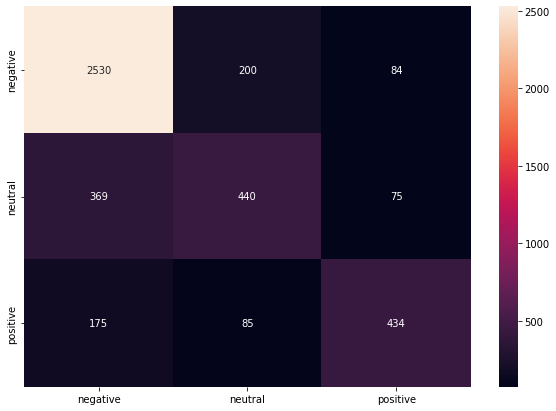

In [70]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = ["negative","neutral","positive"],
                  columns = ["negative","neutral","positive"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Top 40 words from Count Vectorizer**

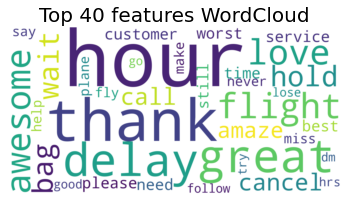

In [71]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**TF-IDF**

In [73]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [75]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [76]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7441939890710383


The model accuracy is 74%

In [77]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

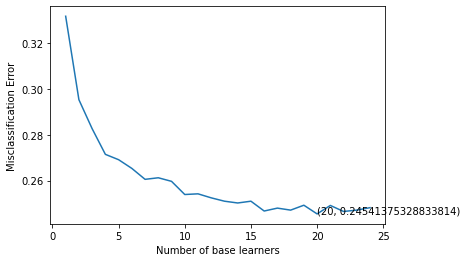

In [78]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [79]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7770947176684881

**The model accuracy after tuning is 77.7%**

In [80]:
result = clf.predict(X_test)

[[2580  182   52]
 [ 389  432   63]
 [ 213   80  401]]
0.7770947176684881


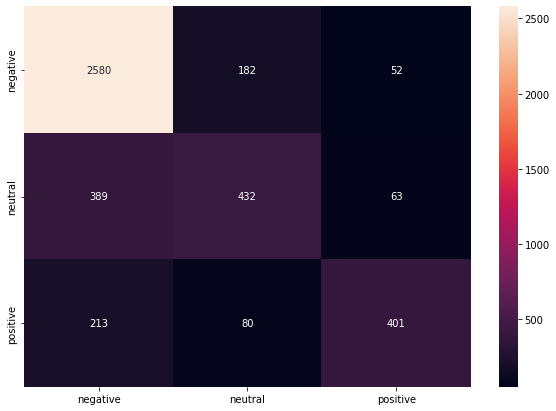

In [81]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = ["negative","neutral","positive"],
                  columns = ["negative","neutral","positive"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

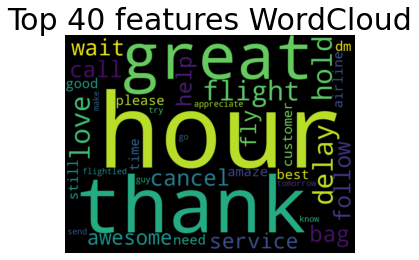

In [82]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

The top 40 words from Count Vectorizer and TFIDF for the top 3 or 4 words remain the same - words like 'hour', 'great', 'thank' but other words differ a bit

## Summary:

* From Exploratory Data Analysis we saw:

  * Most of the tweets have negative sentiment - about 62%, followed by neutral tweets - 21%, and then positive tweets - 16%

  * United airline has the most tweets at about 3800, American, Delta, Southwest, US Airways all have almost the same number of tweets at about 2300 - 2700. Virgin America has the lowest number of tweets contritbuting only 3.4%

  * Except for Virgin America and Delta, all the airlines had majority negative tweets.

  * For Delta, 'Late flight' has been their key problem

  * For all other airlines, 'Customer Service Issue' seems to be the key issue  

* We did preprocessing of text data - tokenization, removing html, replacing contractions, replacing numbers, removing stopwords and using lemmatization after converting to lower case words, removing punctuations. 

* Since all the tweets contained tagging of airline names, we also removed the words used for tagging like jetblue, usairways, americanair, etc,. to prevent these words to occur as most repeating words so that these words wont bias the data

* we built two randomforest models after converting these tokenized words to numbers using countvectorizer and TF-IDF

* Both the classification with Countvectorier and TF-IDF give pretty much the same accuracy - the accuracy might increase with increase datapoints.

* If we were to propose an idea to airlines - improving customer service and on-time flights might reduce the negative tweets